# Homework 5 Part 2 - Solutions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Problem 1

**In this problem you will be working with the [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine) from the UCI ML Repository. It consists of 178 wine samples with 13 features describing their different chemical properties. Let's load the data:**

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                   'Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**Use the Logistic Regression algorithm with Lasso (or L1) regularizer to perform classification on this dataset.**

* **When using ```sklearn.linear_model.LogisticRegression```, be sure to use the appropriate ```solver``` that allows for L1 penalty (read documentation).**

* **Select a value for the regularizer weight (parameter ```C```).**

* **For each class, visualize the weight coefficients for each feature (use the attribute ```coef_```) and the bias term (use the attribute ```intercept_```).**

**To successfully train and evaluate your classifier, make sure to: (1) pre-process the data, (2) partition the data with 70% training and 30% testing.**

**In your answer, include:**

1. **Create a plot that visualizes the learned weight coefficient for each feature (y-axis) as the value for the parameter $C$ changes. Consider only coefficients for class with label 2. It may be useful to visualize this plot in log-scale.**

In [4]:
X = df_wine[df_wine.columns[1:]].to_numpy()
y = df_wine['Class label'].to_numpy()

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((124, 13), (124,), (54, 13), (54,))

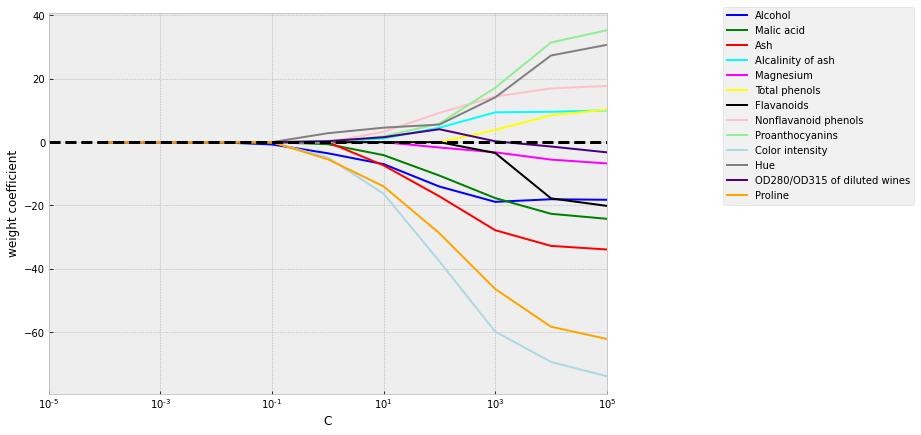

In [6]:
from sklearn.linear_model import LogisticRegression

fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black','pink', 'lightgreen',
          'lightblue','gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4, 6):
    model = LogisticRegression(penalty='l1', C=10.0**c, random_state=0, solver='liblinear')
    model.fit(X_train, y_train)
    weights.append(model.coef_[1])
    params.append(10.0**c)
    w = np.array(weights)
    
for column, color in zip(range(w.shape[1]), colors):
    plt.plot(params, w[:, column], label=df_wine.columns[column+1],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10.0**(-5), 10.0**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left',)
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

As we can see, all features weights will be zero if we penalize the model with a strong regularization parameter ($C<0.1$); $C$ is the inverse of the regularization parameter $\lambda$.

2. **Specify the weights and bias parameters of the discriminant function when $C=0.5$. Which features were *selected*?**

In [7]:
model = LogisticRegression(penalty='l1', C=0.5, solver='liblinear')
model.fit(X_train, y_train)

print('Coefficients for Class 2:')
[print(df_wine.columns[i+1]+': w_'+str(i+1)+'='+str(model.coef_[1,i])) for i in range(len(model.coef_[1,:]))]

print('\n Bias coefficient for Class 2: b = ',model.intercept_[1])

Coefficients for Class 2:
Alcohol: w_1=-2.4320170000542167
Malic acid: w_2=0.0
Ash: w_3=0.0
Alcalinity of ash: w_4=0.0
Magnesium: w_5=0.0
Total phenols: w_6=0.0
Flavanoids: w_7=0.0
Nonflavanoid phenols: w_8=0.0
Proanthocyanins: w_9=0.0
Color intensity: w_10=-3.1232976031857285
Hue: w_11=1.8810281126367516
OD280/OD315 of diluted wines: w_12=0.18792872286902854
Proline: w_13=-3.0737101200546797

 Bias coefficient for Class 2: b =  1.7418591412536588


For $C=0.5$, we see that features alcohol, color intensity, hue, OD280/OD315 and proline have a weight coefficient different than zero, hence they will makeup for the prediction of class 2 samples.

3. **For $C=0.5$, compute the accuracy scores and confusion matrices for both training and test sets.**

In [8]:
from sklearn.metrics import confusion_matrix

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Training accuracy: ',np.round(100*model.score(X_train, y_train),2),'%')
print('Confusion matrix in Training: \n', confusion_matrix(y_train,y_train_predict),'\n\n')

print('Test accuracy: ',np.round(100*model.score(X_test, y_test),2),'%')
print('Confusion matrix in Test: \n',confusion_matrix(y_test,y_test_predict))

Training accuracy:  96.77 %
Confusion matrix in Training: 
 [[42  2  0]
 [ 0 45  2]
 [ 0  0 33]] 


Test accuracy:  96.3 %
Confusion matrix in Test: 
 [[15  0  0]
 [ 1 23  0]
 [ 0  1 14]]


# Problem 2

**In this problem, you will use the same [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine) from the UCI ML Repository.**

**Use Recursive Feature Elimination ([```sklearn.feature_selection.RFE```](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)) with the logistic regression classifier with L1-penalty and $C=0.5$ from problem 1.**

**Your goal in this problem is to assess which features to select that maximize accuracy. Answer the following questions:**

1. **Vary the number of features to select from 13 to 1, determine which features are selected and the resulting accuracy.**
    * **To find which features were selected, you can use the attribute ```support_```.**

In [9]:
from sklearn.feature_selection import RFE

for i in range(13):
    selector = RFE(model, n_features_to_select=13-i, step=1)
    selector = selector.fit(X_train, y_train)
    
    print('Preserve: ', 13-i, ' features')
    print('Accuracy in Training = ',round(selector.score(X_train, y_train)*100,2),'%')
    print('Accuracy in Test = ',round(selector.score(X_test, y_test)*100,2),'%')
    print('Features to use: ',df_wine.columns[1:][selector.support_].values)
    print('Features to remove: ', np.setdiff1d(df_wine.columns[1:].values, df_wine.columns[1:][selector.support_].values))
    print('---------------------------------------------------------------------')
    print('---------------------------------------------------------------------')

Preserve:  13  features
Accuracy in Training =  96.77 %
Accuracy in Test =  96.3 %
Features to use:  ['Alcohol' 'Malic acid' 'Ash' 'Alcalinity of ash' 'Magnesium'
 'Total phenols' 'Flavanoids' 'Nonflavanoid phenols' 'Proanthocyanins'
 'Color intensity' 'Hue' 'OD280/OD315 of diluted wines' 'Proline']
Features to remove:  []
---------------------------------------------------------------------
---------------------------------------------------------------------
Preserve:  12  features
Accuracy in Training =  96.77 %
Accuracy in Test =  96.3 %
Features to use:  ['Alcohol' 'Malic acid' 'Alcalinity of ash' 'Magnesium' 'Total phenols'
 'Flavanoids' 'Nonflavanoid phenols' 'Proanthocyanins' 'Color intensity'
 'Hue' 'OD280/OD315 of diluted wines' 'Proline']
Features to remove:  ['Ash']
---------------------------------------------------------------------
---------------------------------------------------------------------
Preserve:  11  features
Accuracy in Training =  96.77 %
Accuracy in Tes

2. **How many and which features should you keep to maintain the accuracy in the training data set? What is the accuracy in the test set using the selected features?**

Only 5 features are needed in order to maintain the accuracy obtained with 13 features. Those 5 features are: Alcohol, Color intensity, Hue, OD280/OD315 of diluted wines, Proline. These features return 95.97% accuracy in training and 90.74% accuracy in test.

# Problem 3

**In this problem you will be working with the Olivetti Faces Dataset. Let's load the data:**

Dataset consists of 400 faces


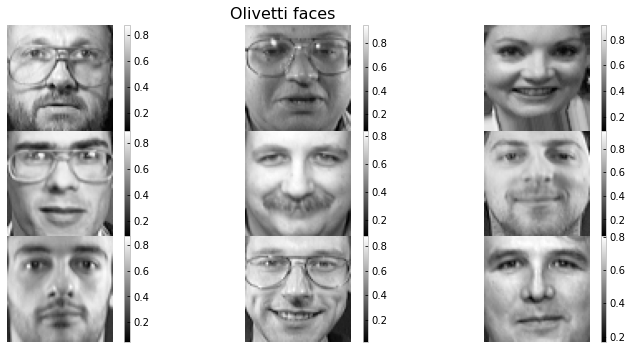

In [10]:
from sklearn.datasets import fetch_olivetti_faces

n_row, n_col = 3, 3
image_shape = (64, 64)

# Load faces 
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data
labels = dataset.target
n_samples, n_features = faces.shape

print('Dataset consists of %d faces' % n_samples)

#Define function to plot exampes
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(10,5))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape((64,64))
        plt.imshow(comp,cmap='gray')
        plt.colorbar(); plt.axis('off');
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    
plot_gallery("Olivetti faces", faces[:9,:])

**The dataset is stored in ```faces```:**

In [11]:
faces.shape

(400, 4096)

**This is the input matrix of size $N\times D$, where $N=400$ is the number of images and $D=4096$ is the dimensionality of each image (in the pixel space, each image can be reshaped to a $64\times 64$ image).**

**There are 10 samples for each class, and a total of 40 classes (each class is a different person).**

**For example, label 3:**

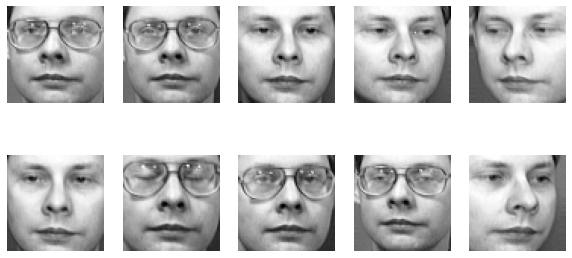

In [16]:
plt.figure(figsize=(10,5))
idx = np.where(labels==3)[0]
for i in range(len(idx)):
    plt.subplot(2,5,i+1)
    plt.imshow(faces[idx[i],:].reshape((64,64)),cmap='gray')
    plt.axis('off');

1. **Partition the data into 80% training and 20% test.**

In [17]:
# Normalize data (Min-Max scaling)
faces = faces/255.0

# Training/Test Split
X_train, X_test, y_train, y_test = train_test_split(faces, labels, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 4096), (80, 4096), (320,), (80,))

2. **Use PCA to project the data into a 9-dimensional space. Plot the correspondent 9 eigenvectors (*Principal Components* or PCs) for the training set. Describe what these 9 PCs represent. (For image datasets, the principal components are also referred to *eigenfaces*)**
    * **The function "plot_gallery" may be useful for this.**

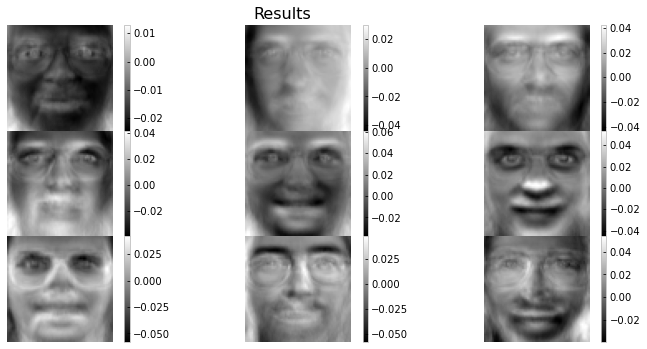

In [18]:
from sklearn.decomposition import PCA

model_pca = PCA(n_components=9)
model_pca.fit(X_train)

plot_gallery('Results', model_pca.components_)

The principal components (eigenvectors of the covariance matrix) are displayed in decreasing eigenvalue value from left to right, top to bottom.

* We observe that the first eigenvector represents the pixel values for the lower left and right corners of the image.
* The second eigenvector represents the light conditions on the left side of person's face.
* The third eigenvector represents eyebrows.
* The fourth seems to represent a few facial features: inner eyebrow, mustache and lower corners of image
* The fifth eigenvector represents eyelids, mustache, chin and cheeks
Similar interpretations can be applied to the other eigenvectors.

An image will then be reconstructed using the principal components.

3. **Use PCA to project the data into a 2-dimensional space and plot the results. Comment on the separability of the classes in training.**

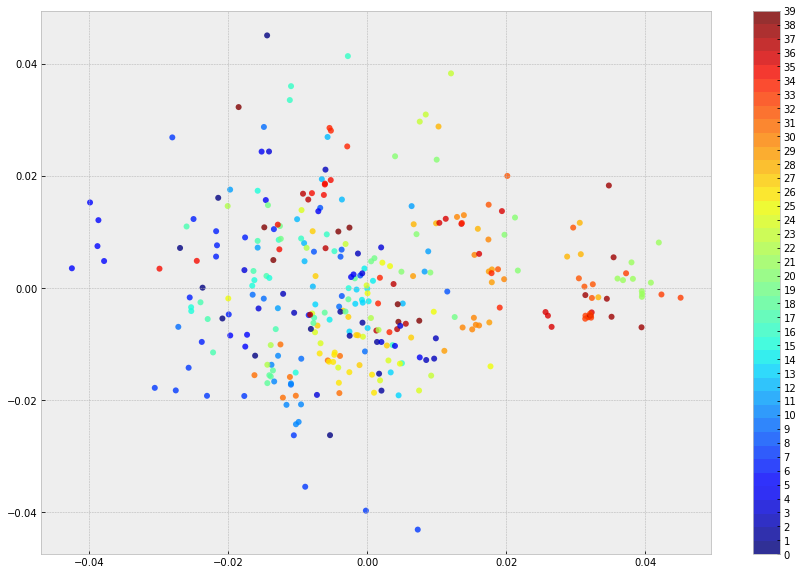

In [19]:
pca = PCA(n_components = 2)
pca_projection = pca.fit_transform(X_train)

plt.figure(figsize=(15,10))
plt.scatter(pca_projection[:,0],pca_projection[:,1], c=y_train, 
            edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('jet', 40))
plt.colorbar(ticks=range(40));

The classes have a significant region of overlap in the projected 2-D space. It will be difficult to accurately classify new samples in this projection space.

PCA does not account for class labels, so it is **not** expected that its projections maximize class separability.

4. **Use LDA to project the data into a 2-dimensional space and plot the results. Comment on the separability of the classes, compare it with the PCA results in training.**

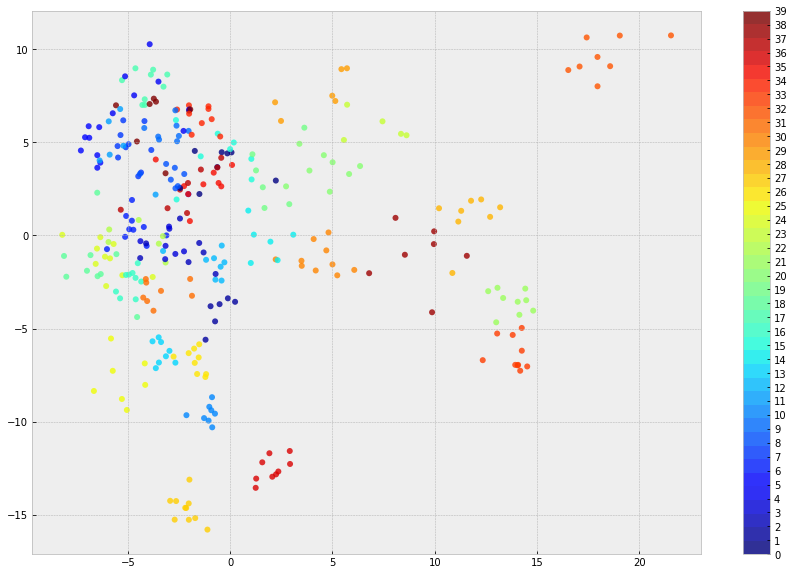

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
lda_projection = lda.fit_transform(X_train, y_train)

plt.figure(figsize=(15,10))
plt.scatter(lda_projection[:,0],lda_projection[:,1], c=y_train, 
            edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('jet', 40))
plt.colorbar(ticks=range(40));

On the other hand, LDA is a supervised dimensionality reduction technique. So the projection space is found such that the class separability is maximized, in particular: maximize inter-cluster distance and minimize intra-cluster compactness.

The 2-D projection preserves class separability much more successfully than PCA.

5. **Using PCA, what is the minimum number of principal components you need to preserve in order to explain at least 90% of the data?**

In [21]:
pca = PCA(n_components = 100)
pca_projection = pca.fit_transform(X_train)

pca_cmlt_var = np.cumsum(pca.explained_variance_/np.sum(pca.explained_variance_))

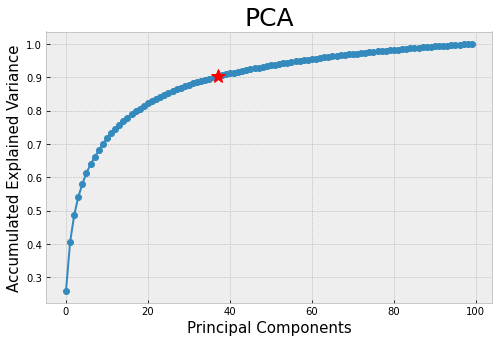

In [22]:
plt.figure(figsize=(8,5))
num_PCs = np.where(pca_cmlt_var>=0.9)[0][0]
plt.plot(pca_cmlt_var,'-o')
plt.plot(num_PCs, pca_cmlt_var[num_PCs],'*r',markersize=15)
plt.xlabel('Principal Components',size=15)
plt.ylabel('Accumulated Explained Variance', size=15)
plt.title('PCA', fontsize=25);

In [23]:
print('We need ',num_PCs, ' principal components in order to explain at least 90% of the data')

We need  37  principal components in order to explain at least 90% of the data


6. **Using LDA, what is the minimum number of components you need to preserve in order to explain 90% of the data?**

In [24]:
lda = LDA(n_components = 39)
projection = lda.fit_transform(X_train, y_train)

In [25]:
lda_cmlt_var = np.cumsum(lda.explained_variance_ratio_/np.sum(lda.explained_variance_ratio_))

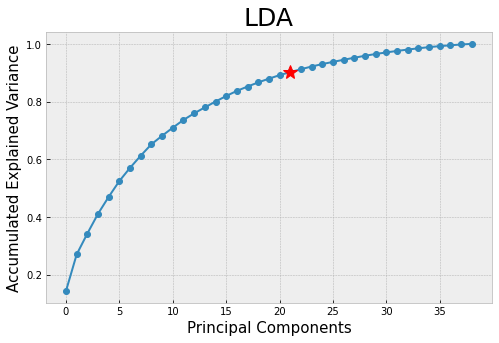

In [26]:
plt.figure(figsize=(8,5))
num_LDs = np.where(lda_cmlt_var>=0.9)[0][0]
plt.plot(lda_cmlt_var,'-o')
plt.plot(num_LDs, lda_cmlt_var[num_LDs],'*r',markersize=15)
plt.xlabel('Principal Components',size=15)
plt.ylabel('Accumulated Explained Variance', size=15)
plt.title('LDA', fontsize=25);

In [27]:
print('We need ',num_LDs, ' LDA components in order to explain at least 90% of the data')

We need  21  LDA components in order to explain at least 90% of the data


7. **Use the results from parts 5 and 6, to train a $k$-NN classifier with $k=3$. Which set of features performed better?**

In [28]:
pca = PCA(n_components = num_PCs)
X_pca = pca.fit_transform(X_train)

lda = LDA(n_components = num_LDs)
X_lda = lda.fit_transform(X_train, y_train)

In [29]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report

n_neighbors = 3

knn_pca = KNN(n_neighbors)
knn_pca.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test)
pred_pca = knn_pca.predict(X_test_pca)
print('PCA Performance')
print(classification_report(y_test, pred_pca))

PCA Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      0.67      0.80         3
           3       0.20      0.50      0.29         2
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         2
           8       0.50      0.67      0.57         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.75      0.86         4
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4
          15       0.50      1.00      0.67         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          1

In [30]:
knn_lda = KNN(n_neighbors)
knn_lda.fit(X_lda, y_train)

X_test_lda = lda.transform(X_test)
pred_lda = knn_lda.predict(X_test_lda)
print('LDA Performance')
print(classification_report(y_test, pred_lda))

LDA Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          1

(Different train/test splits will produce slightly different classification performances.)

For this split, LDA features outperformed PCA features, with an overall accuracy performance of 97% and 88%, respectively.

Both feature sets are explaining the same amount of variance in the data (although each measures different information). LDA uses less features than PCA to explain the same amount of variance, so we say that the model using LDA features is more robust.

# Problem 4

**In this question will explore manifold learning. You have been given 3 data sets with varying original dimensionality in each.**

1. **Clusters Data Set: (or "Gaussian clouds) this data set is 10-dimensional. Goal: It contains three groups of data that where each group should be classified into separate classes.**

2. **Swiss Roll Data Set: this data set is 3-dimensional. Goal: One group of data where neighboring points on the surface should remain neighbors after dimensionality reduction and points far on the surface should remain far from each other after dimensionality reduction.**

3. **Half moons Data Set: this data is 3-dimensional. Goal: Two groups of data that where each group should be classified into a separate class.**

**Here are the data sets:**

Clusters Data Set: (600, 10)
Swissroll Data Set:  (500, 3)
Halfmoons Data Set:  (500, 3)


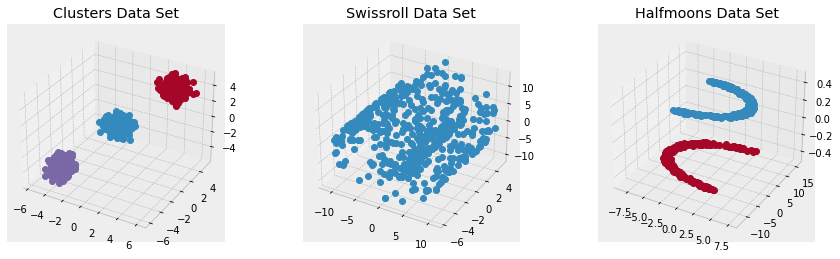

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15, 4))

#Load Clusters
clusters = np.loadtxt('clusters.txt') 
X1_labels = clusters[:,10] 
X1 = clusters[:,:10]
X1 = X1 - np.mean(X1,axis=0)
print('Clusters Data Set:', X1.shape)
ax = fig.add_subplot(131, projection='3d')
for i in range(1,4):
    ax.plot3D(X1[X1_labels==i,0],X1[X1_labels==i,1], X1[X1_labels==i,2],'o');
plt.title('Clusters Data Set');

# Load Data Swissroll
X2 = np.loadtxt('swissroll.txt') 
X2 = X2 - np.mean(X2,axis=0)
print('Swissroll Data Set: ', X2.shape)
ax = fig.add_subplot(132, projection='3d')
ax.plot3D(X2[:,0],X2[:,1], X2[:,2],'o');
plt.title('Swissroll Data Set');

#Load Halfmoons
halfmoons = np.loadtxt('halfmoons.txt') 
X3_labels = halfmoons[:,3] 
X3 = halfmoons[:,:3]
X3 = X3 - np.mean(X3,axis=0)
print('Halfmoons Data Set: ',X3.shape)
ax = fig.add_subplot(133, projection='3d')
for i in range(1,3):
    ax.plot3D(X3[X3_labels==i,0],X3[X3_labels==i,1], X3[X3_labels==i,2],'o');
plt.title('Halfmoons Data Set');

1. **(15 points) Answer the following questions:**

    * **Build code implementation for classic MDS (consider Euclidean distance).**
    * **Complete the Floyd-Warshal algorithm in the ISOMAP starter code provided.**
    * **Complete the LLE starter code with the last steps of the algorithm implementation.**

In [3]:
from numpy.matlib import repmat
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from time import time

**Classic MDS:** unsupervised dimensionality reduction algorithm based on Euclidean distances between pairs of data. Classic MDS projects the data to a lower dimensional space such that the Euclidean distances between every pair of points are preserved in the lower dimensional space.

In [4]:
def MDS(D, out_dim):
    '''This function implements MDS'''
    N = len(D)       # Number of samples
    D_sq = D**2      # Elementwise square
    J = np.eye(N) - np.ones((N,N)) / N    # J matrix NxN
    B = -J.dot(D_sq).dot(J)/2     # B matrix NxN
    eigen_vals, eigen_vecs = np.linalg.eigh(B)    # Eigendecomposition of B
    idx = np.argsort(eigen_vals)[::-1]     # Indexes of sorted eigenvalues in descendent order
    eigen_vals = eigen_vals[idx]     # sorted eigenvalues
    eigen_vecs = eigen_vecs[:,idx]   # sorted eigenvectors
    L  = np.diag(np.sqrt(eigen_vals[0:out_dim]))  # Create Lambda matrix out_dimxout_dim
    V  = eigen_vecs[:,0:out_dim]    # Create V matrix data_dimensionxout_dim 
    y  = V.dot(L)   # Output projections
    return y

**ISOMAP:** unsupervised dimensionality reduction algorithm based on geodesic distances between pairs of data. ISOMAP projects the data to a lower dimensional space such that the Geodesic distances between every pair of points are preserved in the lower dimensional space.

In [5]:
def Isomap(X,k,out_dim,metric='euclidean'):
    '''This function implements ISOMAP'''
    N=len(X)     # Number of samples
    nbrs = NearestNeighbors(n_neighbors=k+1,metric=metric).fit(X) # Structure with nearest neighbors
    distances, indices = nbrs.kneighbors(X)   # Finding indices and distance of neighbors
    Dx = squareform(pdist(X, metric=metric))   # Euclidean distance (default) between pairs of samples
    D = np.multiply(Dx,nbrs.kneighbors_graph(X,k+1).toarray())   # Replace graph matrix with euclidean distances
    D[D == float(0)] = 10**10       # Make everyother element to a really large number 10**10
    D = D - np.diag(np.ones(N,)).dot(10**10)   # make sure the distance of each sample to itself is 0
    for k in range(N):          # Floyd-Warshal algorithm to find shortest path/geodesic distances
        for i in range(N):
            for j in range(N):
                if D[i,j]>D[i,k]+D[k,j]:
                    D[i,j] = min(D[i,j],D[i,k]+D[k,j])
    y = MDS(D,out_dim) # Run MDS with Geodesic distances
    return y

**LLE:** unsupervised dimensionality reduction algorithm based on locally linear representations of the manifold. LLE represents a manifold in a lower dimensional space as a combination of locally linear patches.

In [6]:
def LLE(X, k, out_dim):
    '''This function implements LLE'''
    N = len(X)      # Number of samples
    D = X.shape[1]  # Number of dimensions
    nbrs = NearestNeighbors(n_neighbors=k+1,metric='euclidean').fit(X)  # Structure with nearest neighbors
    distances, indices = nbrs.kneighbors(X)   # Finding indices and distance of neighbors
    W = np.zeros((N,N))          # Matrix of weights NxN
    e = np.ones(k)               # Vector of ones kx1
    I = np.eye(N)                # Identity matrix NxN
    for i in range(N):  # For every samples, find the set of weights that reconstruct each point from its neighbors
        Vi = X[indices[i,1::],:].T        # Matrix of neighbors Dxk
        Xi = X[i,:].T                     # Sample point Dx1
        G = (repmat(Xi, k, 1).T-Vi).T@(repmat(Xi, k, 1).T-Vi) # Gram matrix kxk
        if k > D:   # If the number of neighbors is larger than dimensions, 
                    #than the Gram matrix is not full rank, 
                    #therefore is not invertible
            wi = np.linalg.inv(G+0.001*np.eye(k))@e.T/2  # Diagonally load the Gram matrix and compute weights kx1
        else:       # Otherwise
            wi = np.linalg.inv(G)@e.T/2  # compute weights kx1    
        wi = wi/sum(wi)                  # Make sure the weights sum to 1
        W[indices[i,1::],i] = wi         # Append the weights into the big matrix of weights
    M = (I-W)@(I-W).T                    # Compute M matrix NxN    
    eigvals, eigvecs = np.linalg.eig(M)  # Eigendecomposition of M
    index = eigvals.argsort()            # Indices of sorted eigenvalues is ascendent order
    eigenvecs = eigvecs[:,index]         # Eigenvectors e sorted in ascendent order
    Y = eigenvecs[:,1:out_dim+1]         # Projection onto [e_2,...,e_out_dim]
    return Y

2. **(10 points) Using your completed code, project each data set down to 2-dimensions using classic MDS, ISOMAP and LLE. Include a discussion that addresses whether these 3 algorithms are able to meet the "goal" of the data set outlined above.**

In [36]:
def RunAll(X, labels, k_isomap, k_lle, out_dim, name):
    # X: data set with dimensions NxD
    # labels: vector of labels or empty list
    # k_isomap: number of neighbors for ISOMAP
    # k_lle: number of neighbors for LLE
    # out_dim: output dimension
    # name: name of the data set for plotting
    
    # Run MDS and record time
    t0_MDS = time()
    D = squareform(pdist(X, metric='euclidean')) # classic MDS takes in Euclidean distance matrix
    y_MDS = MDS(D, out_dim)
    t1_MDS = time()
    
    # Run ISOMAP and record time
    t0_isomap = time()
    y_isomap = Isomap(X, k_isomap, out_dim)
    t1_isomap = time()
    
    # Run LLE and record time
    t0_lle=time()
    y_lle = LLE(X, k_lle, out_dim)
    t1_lle=time()
    
    # Display time
    print("---------------------------------------")
    print(name + " Data Set")
    print("Classic MDS: %.2g sec" % (t1_MDS - t0_MDS))
    print("Isomap: %.2g sec" % (t1_isomap - t0_isomap))
    print("LLE: %.2g sec" % (t1_lle - t0_lle))
    print("---------------------------------------")
    
       
    if len(labels)==0:
        fig = plt.figure(figsize=(20, 5))
        plt.suptitle(name + ' Data')
        ax = fig.add_subplot(141, projection='3d')
        ax.scatter(X[:,0],X[:,1], X[:,2], color='b')
        ax.set_xlabel('Dimension 1')
        ax.set_ylabel('Dimension 2')
        ax.set_zlabel('Dimension 3')
        ax.set_title(name + ' Data Set')
        ax = fig.add_subplot(1,4,2)
        plt.scatter(y_MDS[:,0],y_MDS[:,1], color='b')
        plt.title("Classic MDS")
        ax = fig.add_subplot(1,4,3)
        plt.scatter(y_isomap[:,0],y_isomap[:,1], color='b')
        plt.title("ISOMAP (" + str(k_isomap) +" neighbors)")
        ax = fig.add_subplot(1,4,4)
        plt.scatter(y_lle[:,0],y_lle[:,1],color='b')
        plt.title("LLE (" + str(k_lle) +" neighbors)")
    else:
        fig = plt.figure(figsize=(20, 5))
        plt.suptitle(name + ' Data')
        ax = fig.add_subplot(141, projection='3d')
        for i in range(len(np.unique(labels))):
            ax.scatter(X[labels==i+1,0],X[labels==i+1,1], X[labels==i+1,2])
        ax.set_xlabel('Dimension 1')
        ax.set_ylabel('Dimension 2')
        ax.set_zlabel('Dimension 3')
        ax.set_title(name + ' Data Set')
        ax = fig.add_subplot(1,4,2)
        for i in range(len(np.unique(labels))):
            plt.scatter(y_MDS[labels==i+1,0],y_MDS[labels==i+1,1])
        plt.title("Classic MDS")
        ax = fig.add_subplot(1,4,3)
        for i in range(len(np.unique(labels))):
            plt.scatter(y_isomap[labels==i+1,0],y_isomap[labels==i+1,1])
        plt.title("ISOMAP (" + str(k_isomap) +" neighbors)")
        ax = fig.add_subplot(1,4,4)
        for i in range(len(np.unique(labels))):
            plt.scatter(y_lle[labels==i+1,0],y_lle[labels==i+1,1])
        plt.title("LLE (" + str(k_lle) +" neighbors) ")        

---------------------------------------
Clusters Data Set
Classic MDS: 0.039 sec
Isomap: 1.1e+02 sec
LLE: 0.12 sec
---------------------------------------


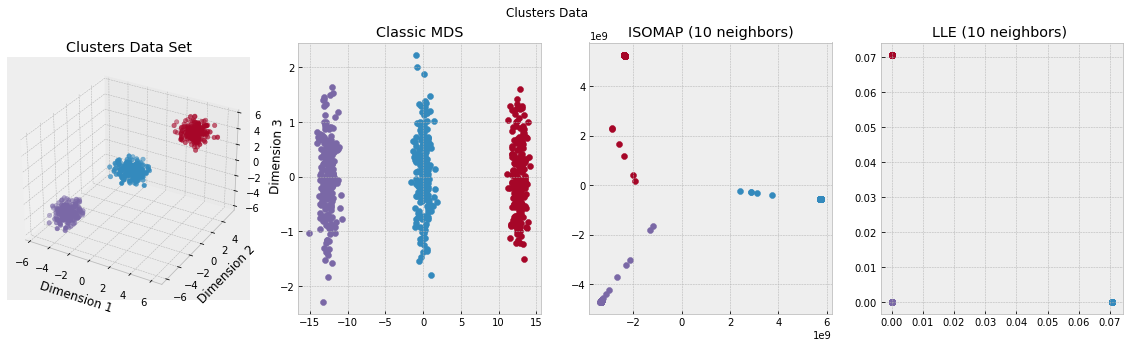

In [37]:
out_dim = 2
RunAll(X1, X1_labels, k_isomap = 10, k_lle = 10, out_dim=2, name='Clusters')

The goal for the *clusters data set* is to maintain each cluster tight and a subsequent classifier should be able to classify the 3 classes classes correctly.

For the *clusters data set*, all three (3) methods are able to preserve the goal of the data set. 

1. As expected, classic MDS performs similarly to PCA and projects the data onto directions of maximum variance. Each cluster is self-contained and non-overlapping with other clusters. 

2. ISOMAP *strecthed out* the clusters slightly but each one has its own *corner* in the feature space. ISOMAP took 210 seconds to complete for a data set of only 600 samples...

3. We can observe the impact of LLE on this data set: if the data belongs to a single manifold, then this manifold will have large holes in the regions between clusters. It is ideal that with such manifold, a small number of neighbors is used. In the example shown above, I used k=10 neighbors. It seems that only samples among the same cluster are contributing to each sample's reconstruction in the 2-D space. Each cluster was projected to a single point which works fine for classification.

---------------------------------------
Swissroll Data Set
Classic MDS: 0.018 sec
Isomap: 65 sec
LLE: 0.13 sec
---------------------------------------


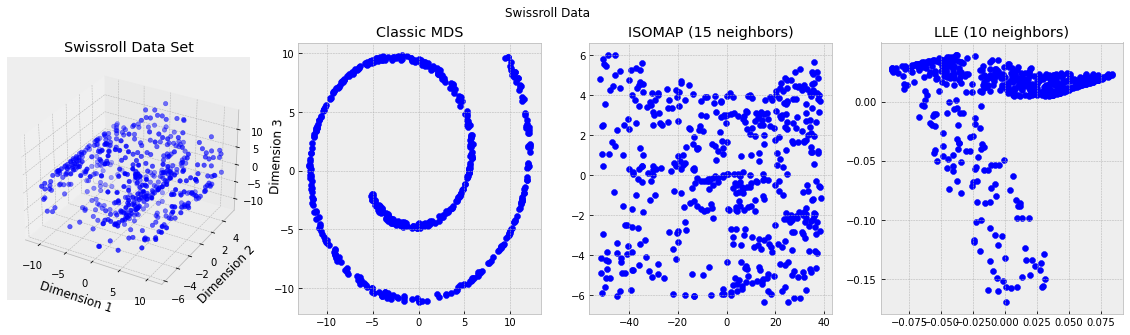

In [38]:
out_dim = 2
RunAll(X2, [], k_isomap = 15, k_lle = 10, out_dim=2, name='Swissroll')

The *swiss roll data set* is one group of data where neighboring points on the surface should remain neighbors after dimensionality reduction and points far on the surface should remain far from each other after dimensionality reduction. 

For the *clusters data set*, only ISOMAP was able to preserve the goal of the data set. 

1. Classic MDS was not able to preserve the goal for this data set. It is only able to explain and maintain part of the manifold. All the points along dimension3=0 are not projected onto a point ~ (0,0) even though they are far away from each other in the original manifold.

2. ISOMAP with k=15 did a good job at *unfolding* the swiss roll into a 2-D space. The relationship between samples is preserved. However, ISOMAP took 140 seconds to finish for only 500 points.

3. LLE is once again affected by goles in the manifold and therefore large number of neighbors will start distorting the 2-D projection (when k is sufficiently large it will achieve the same result as MDS). In the results above, k=10 performed the best but the projection did not preserve the manifold structure.

---------------------------------------
Halfmoons Data Set
Classic MDS: 0.021 sec
Isomap: 62 sec
LLE: 0.096 sec
---------------------------------------


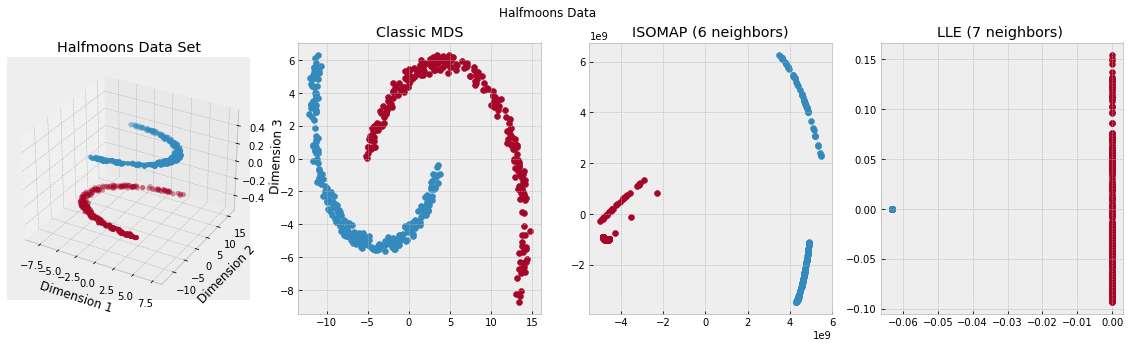

In [39]:
out_dim = 2
RunAll(X3, X3_labels, k_isomap = 6, k_lle = 7, out_dim=2, name='Halfmoons')

The *halfmoons data set* contains two groups of data where each group should be classified into a separate class in the 2-D projection.

For the *halfmoons data set*, both ISOMAP and LLE performed well.

1. For the results achieved with classic MDS only a non-linear classifier will be able to separate the the two groups.

2. For ISOMAP, a linear classifier can easily separate the two groups. The relatoinship between is not well represented for the orange cluster.

3. For LLE, a linear classifier can easily separate the two groups. The relatoinship between is not well represented for the blue cluster.